# Exploring the billing datasets

```Do not run in poetry shell```

In [1]:
# Imports
import sys
sys.path.insert(0,'/mnt/c/dev/cl/pipeline')
from src.config import My_Config as cfg
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

/home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set variables
CONNECTION_STRING = cfg.storage_connection_string()
CONTAINERNAME = cfg.storage_container_name_1()
BLOBNAME = cfg.storage_blob_name()

In [3]:
def create_sas():
    CONTAINERNAME = cfg.storage_container_name_1()
    # BLOBNAME = cfg.storage_blob_name()
    ACCOUNTNAME = cfg.storage_account_name()
    QUERYSTRING = cfg.blob_query_string()
    
    sas_url = f"https://{ACCOUNTNAME}.blob.core.windows.net/{CONTAINERNAME}/{BLOBNAME}{QUERYSTRING}"
    return sas_url
 
    
sas_url = create_sas()

In [4]:
df = pd.read_parquet(sas_url)
df_len, df_width = df.shape
print('Rows: ' +str(df_len),'\nColumns: ' + str(df_width))

Rows: 1008 
Columns: 76


In [5]:
for column in df:
    x = df
    x = x[column].drop_duplicates().dropna()
    print("The column '" + column + "' has " + str(x.shape[0]) + " unique rows")

The column 'id' has 1008 unique rows
The column 'name' has 1008 unique rows
The column 'type' has 1 unique rows
The column 'kind' has 1 unique rows
The column 'billing_account_id' has 1 unique rows
The column 'effective_price' has 7 unique rows
The column 'pricing_model' has 1 unique rows
The column 'billing_account_name' has 1 unique rows
The column 'billing_period_start_date' has 1 unique rows
The column 'billing_period_end_date' has 1 unique rows
The column 'billing_profile_id' has 1 unique rows
The column 'billing_profile_name' has 1 unique rows
The column 'subscription_guid' has 1 unique rows
The column 'subscription_name' has 1 unique rows
The column 'date' has 19 unique rows
The column 'product' has 18 unique rows
The column 'meter_id' has 33 unique rows
The column 'meter_name' has 27 unique rows
The column 'meter_region' has 5 unique rows
The column 'meter_category' has 6 unique rows
The column 'meter_sub_category' has 13 unique rows
The column 'service_family' has 5 unique row

In [6]:
df.describe()

,effective_price,quantity,cost_in_usd,unit_price,cost_in_billing_currency,cost_in_pricing_currency,exchange_rate_pricing_to_billing,payg_cost_in_billing_currency,payg_cost_in_usd,partner_earned_credit_rate,pay_g_price
count,1008.000000,1008.000000,1008.0,1008.000000,1008.000000,1008.000000,1008.0,1008.000000,1008.000000,1008.0,1008.000000
mean,0.082621,0.032540,0.0,0.133414,0.059097,0.006111,0.0,0.060618,0.006264,0.0,0.138642
std,0.367242,0.178794,0.0,0.377910,0.283306,0.029283,0.0,0.283419,0.029289,0.0,0.376662
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000100,0.0,0.004730,0.000000,0.000000,0.0,0.000031,0.000003,0.0,0.004730
50%,0.000000,0.000500,0.0,0.021600,0.000000,0.000000,0.0,0.000056,0.000006,0.0,0.045000
75%,0.039798,0.014600,0.0,0.059400,0.000034,0.000004,0.0,0.000327,0.000034,0.0,0.100000
max,2.635503,1.341935,0.0,2.640000,1.958875,0.202462,0.0,1.960801,0.202632,0.0,2.640000


AWS-Billing-Data.parquet

AWS-Billing-Data.parquet



Summarize dataset:  95%|█████████▌| 147/154 [00:15<00:00,  9.39it/s, Missing diagram bar]                                                 /home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (76).')
  warnings.warn(
Generate report str

Azure-Billing-Data.parquet

Azure-Billing-Data.parquet



Summarize dataset:  95%|█████████▌| 147/154 [00:12<00:00, 14.92it/s, Missing diagram bar]                                                 /home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (76).')
  warnings.warn(
Generate report str

GCP-Billing-Data.parquet

GCP-Billing-Data.parquet



Summarize dataset:  95%|█████████▌| 147/154 [00:12<00:00, 15.31it/s, Missing diagram bar]                                                 /home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/home/tj/.cache/pypoetry/virtualenvs/pipeline-MexhjMpT-py3.8/lib/python3.8/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (76).')
  warnings.warn(
Generate report str

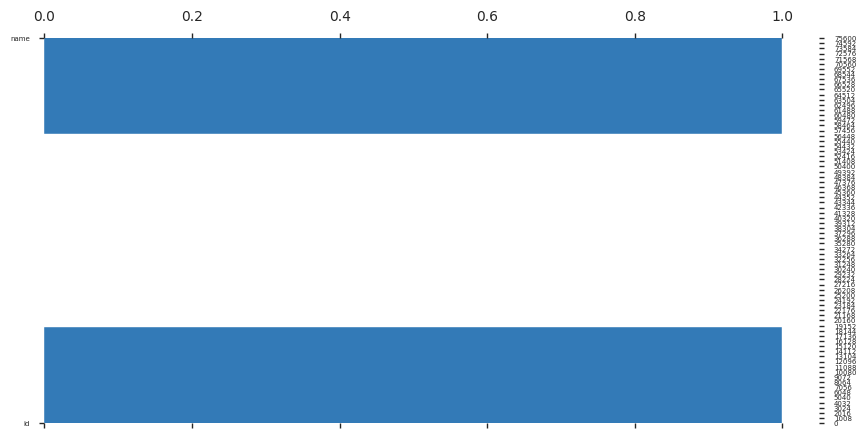

In [7]:
# List files from blob storage
def list_blobs_in_container():
    LOCAL_FILE_PATH = cfg.local_files_path()
    import time
    from azure.storage.blob import BlobServiceClient
    blob_service_client = BlobServiceClient.from_connection_string(CONNECTION_STRING)
    container_client = blob_service_client.get_container_client(CONTAINERNAME)
    blobs_list = container_client.list_blobs()
    for blob in blobs_list:
        blob_name = blob.name
        print(blob.name + '\n')
        blob_name = blob.name
        abr = blob_name[0:3]
        print(blob.name + '\n')
        profile = ProfileReport(df, title= str(abr) + " Billing Report")
        profile.to_file(LOCAL_FILE_PATH + "reports/"+str(abr)+"-Billing-Report.html")
        time.sleep(60)


list_blobs_in_container()